---
title: "03-置信区间（CI）"
author: "Simon Zhou"
date: "2025-05-04"
format: 
    html:
        code-fold: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [2]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

## 置信区间的定义
置信区间是一个范围，用于估计总体参数的可能值。它是基于样本数据计算得出的，并且在一定的置信水平下，包含了总体参数的真实值。
置信区间通常用以下形式表示：

$$ CI = (\hat{\theta} - E, \hat{\theta} + E) $$

其中，$\hat{\theta}$ 是样本统计量的估计值，$E$ 是误差范围（也称为边际误差）。

置信区间计算的一般形式为：
$$ CI = (\hat{\theta} - z_{\alpha/2} \cdot SE, \hat{\theta} + z_{\alpha/2} \cdot SE) $$

置信区间的宽度取决于样本大小、样本标准差和所选的置信水平。较大的样本通常会导致更窄的置信区间，而较高的置信水平则会导致更宽的置信区间。

置信区间的计算通常涉及以下步骤：

1. 选择一个置信水平（例如，95%或99%）。
2. 计算样本统计量（例如，样本均值或样本比例）。
3. 计算样本标准差或标准误差。
4. 根据所选的置信水平，查找相应的临界值（例如，Z值或t值）。
5. 计算置信区间的边际误差。
6. 构建置信区间。
7. 解释置信区间的含义。
8. 报告置信区间的结果。
9. 进行假设检验时，置信区间可以用来判断是否拒绝原假设。
10. 在进行回归分析时，置信区间可以用来评估回归系数的显著性和可靠性。
11. 在进行方差分析时，置信区间可以用来评估组间差异的显著性和可靠性。

In [3]:
%%stata
// 载入数据集，使用 Stata 的内置数据集 auto.dta
sysuse auto, clear


. // 载入数据集，使用 Stata 的内置数据集 auto.dta
. sysuse auto, clear
(1978 automobile data)

. 


## ci mean

连续变量 mean 的标准误（SE）和置信区间（CI）

语法：

```stata
ci mean varname [if] [in] [weight] [,options]
```

或者 

```stata
cii means #obs #mean #sd [,level(#)]
```

默认置信水平为95%，可以通过 `options` 或 `level(#)` 选项更改。

In [4]:
%%stata
ci mean mpg price,level(95)


    Variable |        Obs        Mean    Std. err.       [95% conf. interval]
-------------+---------------------------------------------------------------
         mpg |         74     21.2973    .6725511         19.9569    22.63769
       price |         74    6165.257    342.8719        5481.914      6848.6


In [ ]:
%%stata
cii mean 144 19599 4389,level(95)


    Variable |        Obs        Mean    Std. err.       [95% conf. interval]
-------------+---------------------------------------------------------------
             |        166       19599    340.6525         18926.4     20271.6


## 分类变量的置信区间

### 继续使用 `ci` 命令

`ci` 命令可以用于计算分类变量的置信区间。对于分类变量，通常使用比例（proportion）来表示其分布情况。`ci` 命令可以计算样本比例的置信区间。

```stata
ci priportion varname [if] [in] [weight] [,options]
```

缺点：`ci prop` 只能用于计算 binary 变量的置信区间，不能用于多分类变量。

In [6]:
%%stata
ci prop foreign


                                                            Binomial exact   
    Variable |        Obs  Proportion    Std. err.       [95% conf. interval]
-------------+---------------------------------------------------------------
     foreign |         74    .2972973    .0531331         .196584    .4148353


In [7]:
%%stata
ci prop rep78

no binary (0/1) variables found; nothing to compute


### proportion

`proportion` 命令可以用于计算分类变量的置信区间。它可以处理多分类变量，并且可以计算每个类别的比例和置信区间。

语法形式：

```stata
proportion varname [if] [in] [weight] [,options]
```

默认置信水平为95%，可以通过 `options` 选项更改。

In [8]:
%%stata
prop foreign


Proportion estimation                       Number of obs = 74

--------------------------------------------------------------
             |                                   Logit
             | Proportion   Std. err.     [95% conf. interval]
-------------+------------------------------------------------
     foreign |
   Domestic  |   .7027027   .0531331      .5874215     .796909
    Foreign  |   .2972973   .0531331       .203091    .4125785
--------------------------------------------------------------


In [9]:
%%stata
prop rep78


Proportion estimation                       Number of obs = 69

--------------------------------------------------------------
             |                                   Logit
             | Proportion   Std. err.     [95% conf. interval]
-------------+------------------------------------------------
       rep78 |
          1  |   .0289855   .0201966      .0070794    .1110924
          2  |    .115942   .0385422       .058317    .2173648
          3  |   .4347826   .0596787      .3214848    .5553295
          4  |   .2608696   .0528625      .1695907    .3788629
          5  |   .1594203   .0440694      .0895793     .267702
--------------------------------------------------------------


In [14]:
%%stata
prop foreign rep78


Proportion estimation                       Number of obs = 69

--------------------------------------------------------------
             |                                   Logit
             | Proportion   Std. err.     [95% conf. interval]
-------------+------------------------------------------------
     foreign |
   Domestic  |   .6956522   .0553932      .5755656     .793927
    Foreign  |   .3043478   .0553932       .206073    .4244344
             |
       rep78 |
          1  |   .0289855   .0201966      .0070794    .1110924
          2  |    .115942   .0385422       .058317    .2173648
          3  |   .4347826   .0596787      .3214848    .5553295
          4  |   .2608696   .0528625      .1695907    .3788629
          5  |   .1594203   .0440694      .0895793     .267702
--------------------------------------------------------------


`prop` 多个变量时，Stata 会默认去除缺失值。

## pwcorr

`pwcorr` 命令用于计算变量之间的成对相关系数。它可以处理连续变量和分类变量，并且可以计算每对变量之间的相关系数和置信区间。

```stata
pwcorr [varlist] [if] [in] [weight] [,options]
```

In [19]:
%%stata
pwcorr price headroom mpg displacement


             |    price headroom      mpg displa~t
-------------+------------------------------------
       price |   1.0000 
    headroom |   0.1145   1.0000 
         mpg |  -0.4686  -0.4138   1.0000 
displacement |   0.4949   0.4745  -0.7056   1.0000 


In [ ]:
%%stata
// 展示P值版，并且用星号标记显著性水平为0.05的相关系数
pwcorr price headroom mpg displacement, sig star(0.05)


. // 展示P值版
. pwcorr price headroom mpg displacement, sig star(0.05)

             |    price headroom      mpg displa~t
-------------+------------------------------------
       price |   1.0000 
             |
             |
    headroom |   0.1145   1.0000 
             |   0.3313
             |
         mpg |  -0.4686* -0.4138*  1.0000 
             |   0.0000   0.0002
             |
displacement |   0.4949*  0.4745* -0.7056*  1.0000 
             |   0.0000   0.0000   0.0000
             |

. 


## graph matrix

`graph matrix` 命令用于绘制变量之间的散点图矩阵。它可以处理连续变量和分类变量，并且可以计算每对变量之间的相关系数和置信区间。

`graph matrix [varlist] [if] [in] [weight] [,options]`

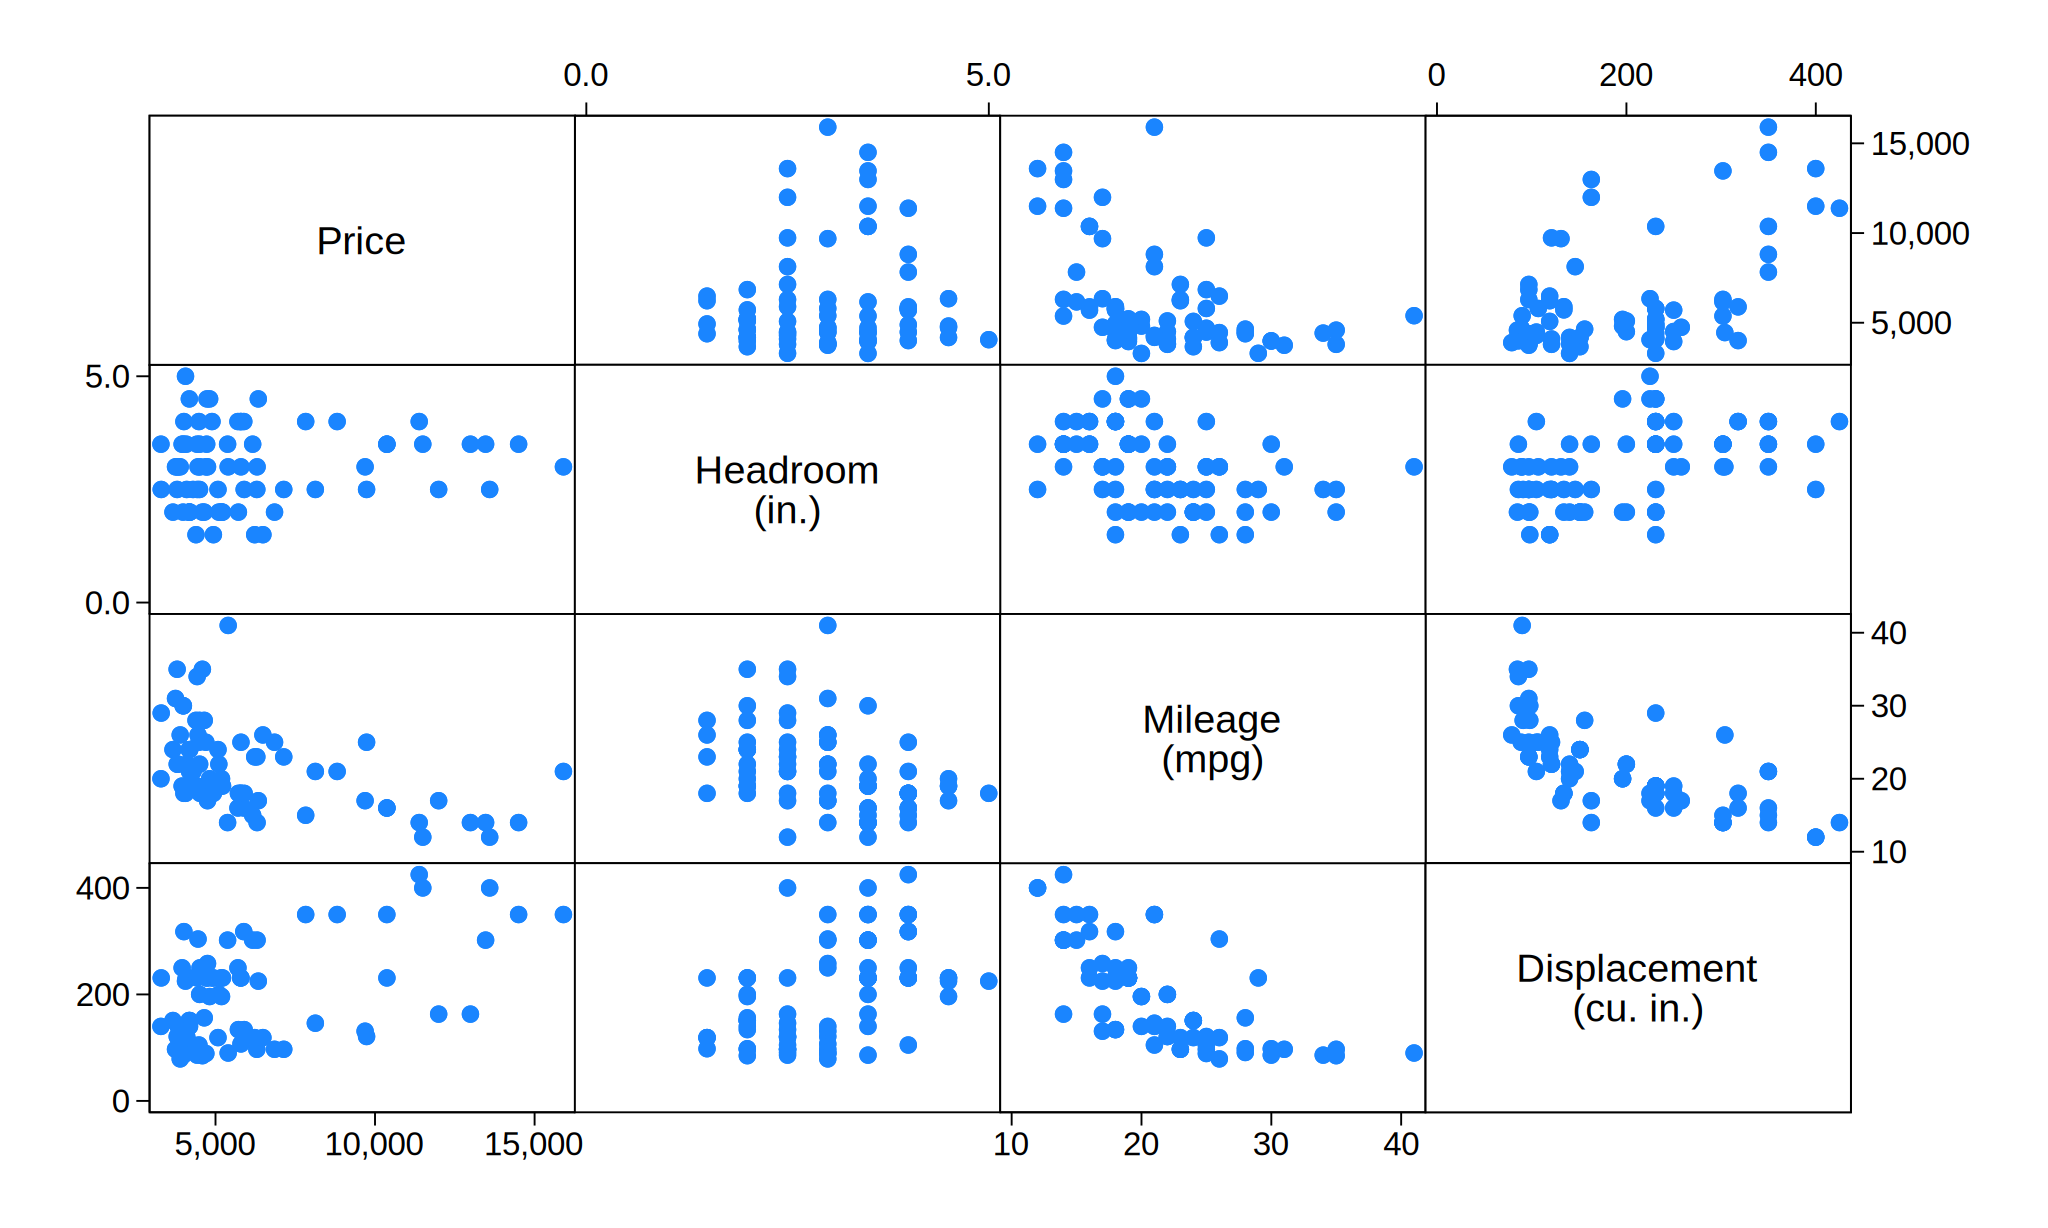

In [22]:
%%stata
graph matrix price headroom mpg displacement

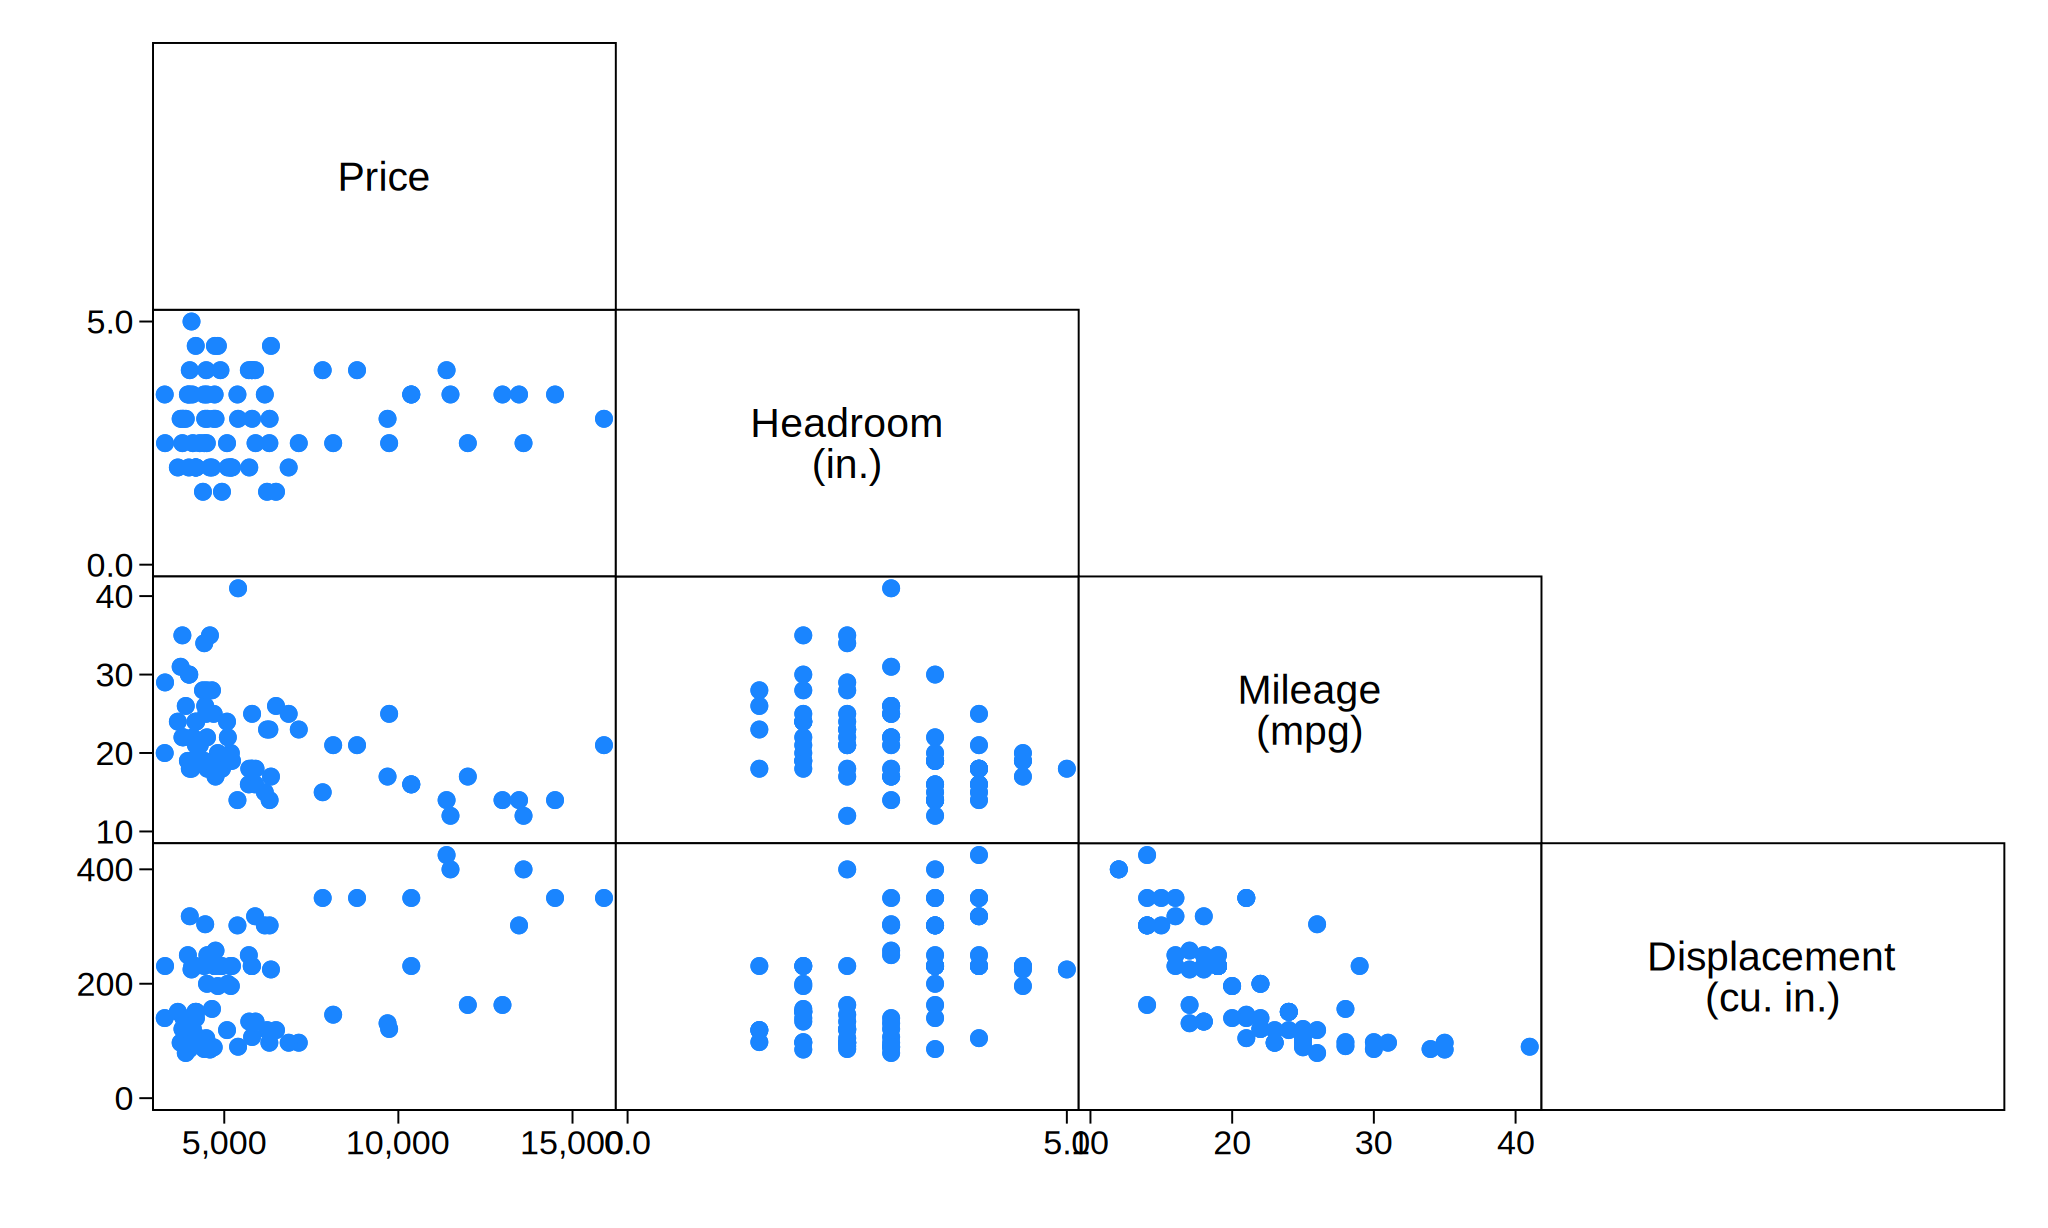

In [23]:
%%stata
graph matrix price headroom mpg displacement, half